<a href="https://colab.research.google.com/github/atopatalos/Repository_Project_dibimbing/blob/main/PR_Day11_Patalo_Paul.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Poin-poin Assignment
0. Import Dataset Telco Churn
1. Jawablah poin-poin assignment yang tertera

Name : PATALO P SELOBAKIN

Pilih salah satu dataset dibawah ini :
1. Telco Churn, Bank Customer Churn, User Churn Dataset dapat di download di : https://drive.google.com/drive/folders/1zYchVO_81JbM4L2D70qmrzwV2w8sM1Cs?usp=sharing atau pada link kaggle di poin 2 dibawah ini.
2. Data Dictionary untuk tiap dataset :
- Telco Churn : https://www.kaggle.com/code/ozlemilgun/telco-churn-prediction/notebook
- Bank Customer Churn : https://www.kaggle.com/datasets/pentakrishnakishore/bank-customer-churn-data?select=churn_prediction.csv
- User Churn Dataset : https://www.kaggle.com/datasets/fridrichmrtn/user-churn-dataset



In [ ]:
# load pandas untuk data wrangling
import pandas as pd
# load numpy untuk manipulasi vektor
import numpy as np
# load matplotlib untuk visualisasi data
import matplotlib.pyplot as plt
# load seaborn untuk visualisasi data
import seaborn as sns

# load metrics object dari sklearn
from sklearn import metrics
# load train-test data splitter
from sklearn.model_selection import train_test_split
# Import Decision Tree classifier (DT)
from sklearn.tree import DecisionTreeClassifier
# Import Logistic Regression classifier
from sklearn.linear_model import LogisticRegression
# load SVM classifier model
from sklearn.svm import SVC
# load KNN classifier model
from sklearn.neighbors import KNeighborsClassifier

#import for metrics
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report,accuracy_score

# Set the maximum number of columns and rows to display to a large number
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

%matplotlib inline

## **Bank Customer**


### **1 . Load Dataset**

In [ ]:
# load dataset ke raw_data
raw_data = pd.read_csv('/content/sample_data/churn_prediction.csv')


### **2 . Data Understanding**

In [ ]:
# Check the raw_data
raw_data.head(10)

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
1,2,2348,35,Male,0.0,self_employed,NaN,2,3214,5390.37,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
3,5,2329,90,NaN,NaN,self_employed,1020.0,2,582,2291.91,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03
5,7,1923,42,Female,0.0,self_employed,1096.0,2,1666,15202.20,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0,2019-11-01
6,8,2048,72,Male,0.0,retired,1020.0,1,1,7006.93,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0,2019-09-24
7,9,2009,46,Male,0.0,self_employed,623.0,2,317,10096.58,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0,2019-07-12
8,10,2053,31,Male,0.0,salaried,1096.0,2,4110,1355.86,1355.86,1702.44,1126.13,714.51,121.09,714.51,359.44,1183.45,1857.42,0,2019-12-12
9,11,2295,40,Male,3.0,self_employed,1020.0,2,38,4957.95,4244.38,2168.53,1864.33,6912.29,4206.13,1887.30,1348.85,1823.16,2416.69,0,2019-12-31


In [ ]:
# Check the exact column name
raw_data.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn',
       'last_transaction'],
      dtype='object')

In [ ]:
# Check the data structure
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28382 entries, 0 to 28381
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     28382 non-null  int64  
 1   vintage                         28382 non-null  int64  
 2   age                             28382 non-null  int64  
 3   gender                          27857 non-null  object 
 4   dependents                      25919 non-null  float64
 5   occupation                      28302 non-null  object 
 6   city                            27579 non-null  float64
 7   customer_nw_category            28382 non-null  int64  
 8   branch_code                     28382 non-null  int64  
 9   current_balance                 28382 non-null  float64
 10  previous_month_end_balance      28382 non-null  float64
 11  average_monthly_balance_prevQ   28382 non-null  float64
 12  average_monthly_balance_prevQ2  

In [ ]:
# Quick check of missing/NA values on each column
raw_data.isna().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
last_transaction                     0
dtype: int64

In [ ]:
# Check Unique values of Categorical
def unique_val(df, column):
  unique_values = df[column].unique()
  count_unique = len(unique_values)
  temp_raw = df.groupby(column, as_index=False).size()
  print(f"Amount of Unique value: {count_unique}")
  print(temp_raw)

  #print(f"Unique values in '{column}': {unique_values}")


Findings :

1.   Categorical values: List item

*   gender
*   occupation
*   city
*   last transaction

2.   Attributes having NULL/NAN values:


*   gender
*   dependence
*   occupation
*   city





In [ ]:
# Check Unique values of Categorical : gender
df = raw_data
column = 'gender'
unique_val(df,column)

Amount of Unique value: 3
   gender   size
0  Female  11309
1    Male  16548


In [ ]:
# Check Unique values of Categorical : occupation
df = raw_data
column = 'occupation'
unique_val(df,column)

Amount of Unique value: 6
      occupation   size
0        company     40
1        retired   2024
2       salaried   6704
3  self_employed  17476
4        student   2058


In [ ]:
# Check Unique values of : customer new category
df = raw_data
column = 'customer_nw_category'
unique_val(df,column)

Amount of Unique value: 3
   customer_nw_category   size
0                     1   3711
1                     2  14559
2                     3  10112


In [ ]:
# Check Unique values of : churn
df = raw_data
column = 'churn'
unique_val(df,column)

Amount of Unique value: 2
   churn   size
0      0  23122
1      1   5260


In [ ]:
# Check Unique values of Categorical : city
df = raw_data
column = 'city'
unique_val(df,column)

Amount of Unique value: 1605
        city  size
0        0.0    16
1        1.0     1
2        2.0     3
3        3.0     2
4        4.0     1
5        5.0     1
6        6.0    12
7        7.0    11
8        8.0     1
9        9.0    10
10      11.0    72
11      12.0     1
12      13.0     2
13      14.0     2
14      15.0   669
15      16.0     4
16      17.0    18
17      18.0     1
18      19.0    15
19      20.0     1
20      21.0    24
21      22.0     1
22      23.0     1
23      24.0     1
24      25.0     1
25      26.0    16
26      27.0     1
27      29.0    16
28      30.0     1
29      31.0     3
30      32.0     8
31      33.0     1
32      34.0    31
33      35.0     1
34      36.0     1
35      37.0     5
36      38.0    60
37      39.0     1
38      40.0     1
39      41.0     3
40      42.0     1
41      43.0     7
42      44.0    19
43      45.0     1
44      46.0     1
45      47.0     2
46      48.0     1
47      49.0     1
48      50.0    30
49      51.0    20
50

In [ ]:
# Check Unique values of Categorical : city
df = raw_data
column = 'last_transaction'
unique_val(df,column)

Amount of Unique value: 361
    last_transaction  size
0         2018-12-31     3
1         2019-01-01     7
2         2019-01-02    12
3         2019-01-03    17
4         2019-01-04    12
5         2019-01-05     4
6         2019-01-06    12
7         2019-01-08    16
8         2019-01-09    20
9         2019-01-10    13
10        2019-01-11    11
11        2019-01-12     8
12        2019-01-13     9
13        2019-01-14     1
14        2019-01-15    24
15        2019-01-16    25
16        2019-01-17     6
17        2019-01-18    15
18        2019-01-19    17
19        2019-01-20    12
20        2019-01-21     4
21        2019-01-22    20
22        2019-01-23    24
23        2019-01-24    30
24        2019-01-25    23
25        2019-01-26    27
26        2019-01-27     7
27        2019-01-28     3
28        2019-01-29    36
29        2019-01-30    20
30        2019-01-31     1
31        2019-02-01    12
32        2019-02-02    12
33        2019-02-03    20
34        2019-02-04     3


In [ ]:
# Check first 10 rows
raw_data['gender'].replace(['Male','Female'],[1,0],inplace=True)
raw_data.head(10)

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,1.0,0.0,self_employed,187.0,2,755,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
1,2,2348,35,1.0,0.0,self_employed,NaN,2,3214,5390.37,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01
2,4,2194,31,1.0,0.0,salaried,146.0,2,41,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
3,5,2329,90,NaN,NaN,self_employed,1020.0,2,582,2291.91,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06
4,6,1579,42,1.0,2.0,self_employed,1494.0,3,388,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03
5,7,1923,42,0.0,0.0,self_employed,1096.0,2,1666,15202.20,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0,2019-11-01
6,8,2048,72,1.0,0.0,retired,1020.0,1,1,7006.93,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0,2019-09-24
7,9,2009,46,1.0,0.0,self_employed,623.0,2,317,10096.58,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0,2019-07-12
8,10,2053,31,1.0,0.0,salaried,1096.0,2,4110,1355.86,1355.86,1702.44,1126.13,714.51,121.09,714.51,359.44,1183.45,1857.42,0,2019-12-12
9,11,2295,40,1.0,3.0,self_employed,1020.0,2,38,4957.95,4244.38,2168.53,1864.33,6912.29,4206.13,1887.30,1348.85,1823.16,2416.69,0,2019-12-31


### **3. Exploratory Data Analysis**
* Jawablah pertanyaan dibawah ini :

### 1. Assignment : Kolom Kategorikal
* 1. Hitung persentase churn rate tiap jenis kategori di tiap kolom kategorikal diatas terhadap kolom Churn.
* 2. Lakukan bar plot untuk melihat porsi persentase tiap kategorikal
* 3. Lakukan interpretasi insight churn rate di tiap kolom kategorikal diatas.



1.1 Churn Value distribution

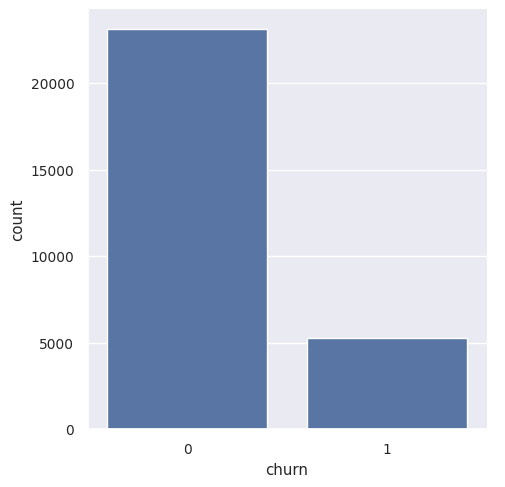

In [ ]:
# Check the distribution of Column 'churn' or checking the balance of labels
# This specifies the type of plot to be created, a count plot in this case.
# A count plot is used to show the counts of observations in each category.
sns.catplot(x = "churn", kind = "count", data = raw_data);

<ipython-input-120-15b2e0174e5c>:5: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.histplot(data=raw_data, x='churn', hue='churn', palette=sns.color_palette())


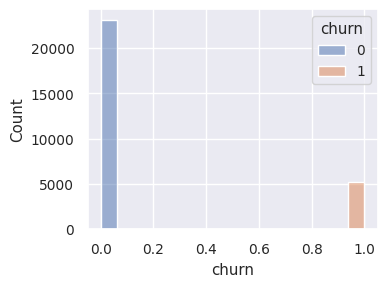

The total - CHURN customers is 5260, which is 18.53% of the total number of customers
The total - NOT CHURN customers is 23122, which is 81.47% of the total number of customers, excluding null values


In [ ]:
fig, ax = plt.subplots(1,1, figsize=(4,3))
sns.set(font_scale=0.9)

## Plot the number of of customers who churned versus who did not
sns.histplot(data=raw_data, x='churn', hue='churn', palette=sns.color_palette())

plt.tight_layout()
plt.show()

## Print the number of customers churned and not churned
no_churned1 = (raw_data['churn'] == 1).sum()
no_churned0 = (raw_data['churn'] == 0).sum()
total_customers = (len(df['customer_id']))
percent_churned1 = (round((no_churned1 / total_customers) * 100, 2))
percent_churned0 = (round((no_churned0 / total_customers) * 100, 2))

print('The total - CHURN customers is {}, which is {}% of the total number of customers'.format(no_churned1, percent_churned1))
print('The total - NOT CHURN customers is {}, which is {}% of the total number of customers, excluding null values'.format(no_churned0, percent_churned0))

In [ ]:
# Check Unique values of : churn
df = raw_data
column = 'churn'
unique_val(df,column)

Amount of Unique value: 2
   churn   size
0      0  23122
1      1   5260


In [ ]:
# Categorical analysis of churn grouped by column 'gender'
# y = is the label target (dependent)
# x = is the categorical (independent)
# This line calculates the proportional value for each group. It divides the count of each group by the total count of groups within the same category of column 'y'.
# The transform('sum') part computes the sum for each group in 'y'.

def proportional_aggregation(df, y, x):
    temp_df = df.groupby([y,x], as_index = False).size()
    temp_df['proportional'] = temp_df['size'] / temp_df.groupby(y)['size'].transform('sum')
    return temp_df

1.2 Gender vs churn

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


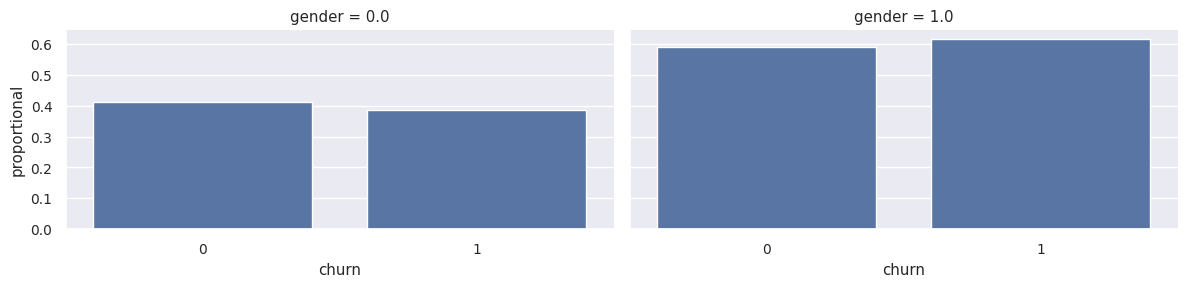

In [ ]:
# Visualization
# gender vs Churn
g = sns.FacetGrid(
    data = proportional_aggregation(raw_data,"churn" ,"gender"), #pilih kolom yang ingin dihitung dan disimpan didalam variabel data
    col = "gender", #Pilih kolom yang ingin dianalisa
    aspect = 2  # value = "2" indicates that the image has 2x width of x
)
g.map(sns.barplot, "churn", "proportional");   # labels in the image

1.3 Occupation vs churn

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


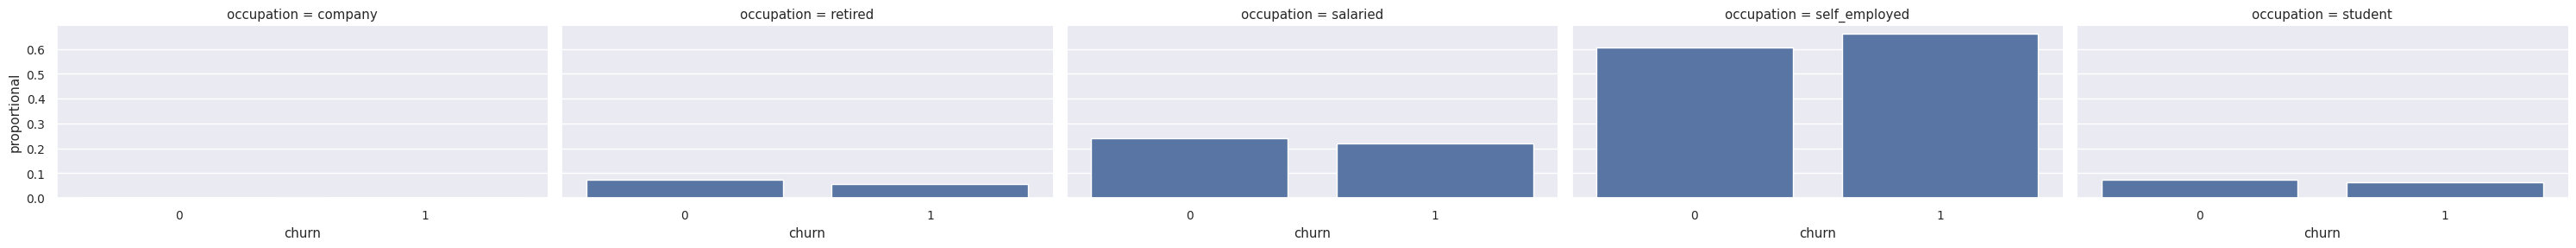

In [ ]:
# Visualization:
# occupation vs Churn
g = sns.FacetGrid(
    data = proportional_aggregation(raw_data,"churn" ,"occupation"), #pilih kolom yang ingin dihitung dan disimpan didalam variabel data
    col = "occupation", #Pilih kolom yang ingin dianalisa
    aspect = 2  # value = "2" indicates that the image has 2x width of x
)
g.map(sns.barplot, "churn", "proportional");   # labels in the image

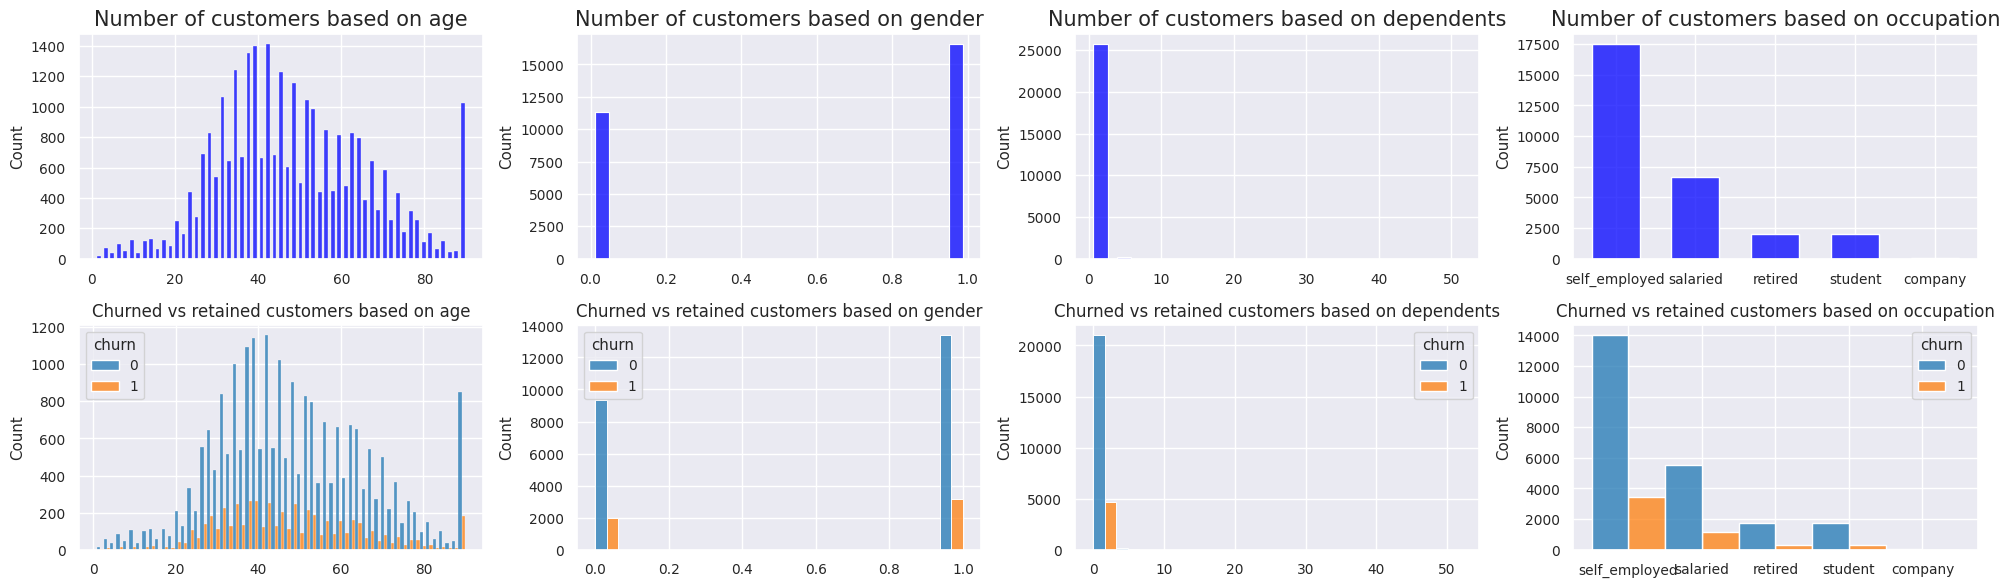

In [ ]:
# Visualization :
# the number of customers based on 'age', 'gender', 'dependents', and 'occupation'
demographic_columns = ['age','gender','dependents','occupation']

fig, axes = plt.subplots(2,4, figsize=(20,6))

axes=axes.flatten()

for i, col in enumerate(demographic_columns):
    ## Determine the number of customers based on 'age', 'gender', 'dependents', and 'occupation'
    sns.histplot(data=raw_data, x=col, multiple='dodge', legend=False, color='blue', shrink=0.6, ax=axes[i])
    axes[i].set_title('Number of customers based on {}'.format(col), fontsize=15)
    axes[i].set_xlabel(xlabel='')
    ## Plot the relationship between 'age', 'gender', 'dependents', 'occupation', and 'churn'
    sns.histplot(data=raw_data, x=col, hue='churn', multiple='dodge', palette=sns.color_palette('tab10', 2), shrink=1, ax=axes[i+4])
    axes[i+4].set_title('Churned vs retained customers based on {}'.format(col).replace('_', ' '), fontsize=12)
    axes[i+4].set_xlabel(xlabel='')

plt.tight_layout()
plt.show()

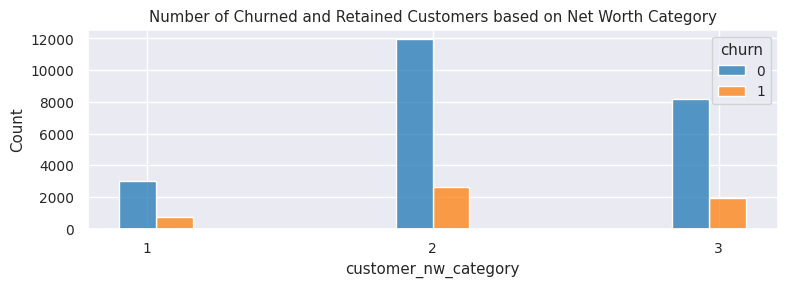

In [ ]:
# Visualization :
# customer_new_category vs churn
fig = plt.subplots(1,1, figsize=(8,3))

sns.histplot(data=raw_data, x='customer_nw_category', hue='churn', multiple='dodge', shrink=4, palette=sns.color_palette('tab10', 2))
plt.xticks([1,2,3])
plt.title('Number of Churned and Retained Customers based on Net Worth Category')

plt.tight_layout()
plt.show()

**Findings on Categorical Attributes:**

1.   **Age**: The highest number of churned is in the range of age 30 to 50. This range also have the high number of non-churned.

2.   **Gender**: Male churn proportion are higher compared to Female.

3.   **Dependent**: No-dependent churn are higher compared to dependent.

4.   **Occupation**: self-employed and salary occupation have the highest churn rate are.

5.   **Customer Networth Category**: churn are higher in category-2 compared to category-1. However non-churn is also much higher compared to churn in category-2.


### 2. Assignment : Kolom Numerikal
* 1. Lakukan Box plot untuk melihat distribusi tiap kolom numerik diatas
* 2. Lakukan interpretasi insight dari hasil box plot untuk kolom numerikal diatas.

2.1 Box Plot for each attribute

In [ ]:
# Check the exact column name
raw_data.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn',
       'last_transaction'],
      dtype='object')

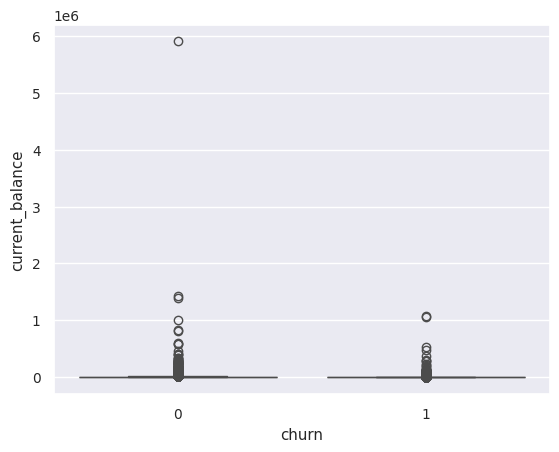

In [ ]:
# Visualize the boxplot :
# Current balance vs Churn
sns.boxplot(x = "churn", y = "current_balance", data = raw_data);

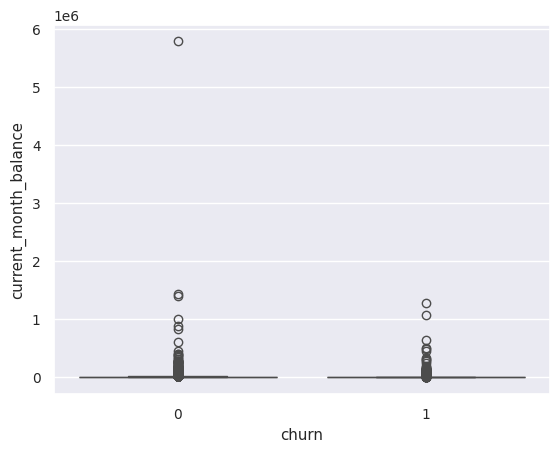

In [ ]:
# Visualize the boxplot :
# Current Month Balance vs Churn
sns.boxplot(x = "churn", y = "current_month_balance", data = raw_data);

<ipython-input-130-59427418ed2b>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=raw_data, x=col, y='churn', orient='h', palette=sns.color_palette('tab10', 2), width=0.4, ax=axes[i])
<ipython-input-130-59427418ed2b>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=raw_data, x=col, y='churn', orient='h', palette=sns.color_palette('tab10', 2), width=0.4, ax=axes[i])


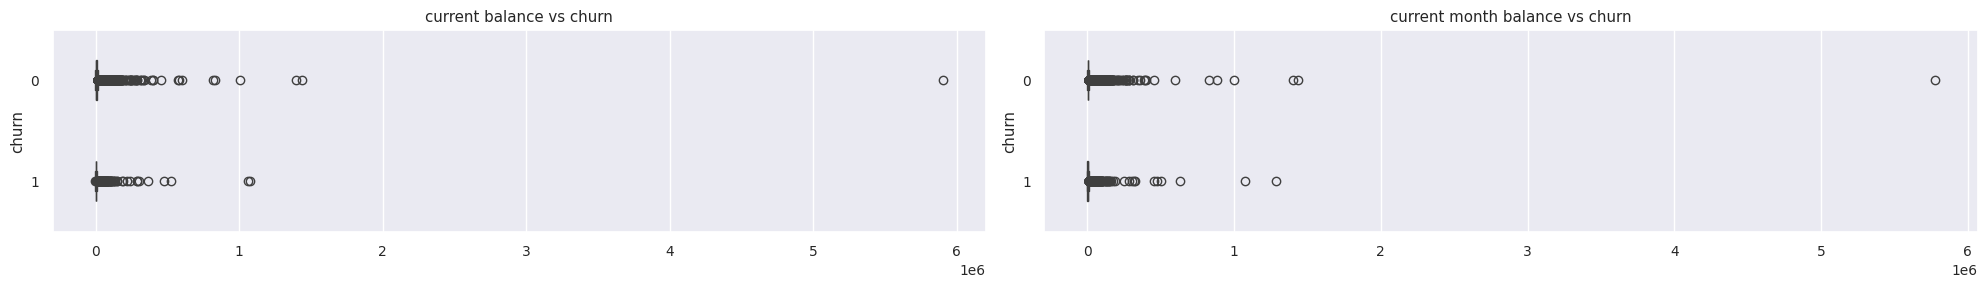

In [ ]:
# Visualize the boxplot :
# Combined current_balance and current_month_balance vs churn
fig, axes = plt.subplots(1,2, figsize=(20,3))
axes=axes.flatten()
sns.set(font_scale=0.9)

curr_prev_month_balance = ['current_balance','current_month_balance']

for i, col in enumerate(curr_prev_month_balance):
    ## Plot the relationship between 'current_balance', 'current_month_balance', 'previous_month_end_balance', and 'previous_month_balance' vs 'churn'
    sns.boxplot(data=raw_data, x=col, y='churn', orient='h', palette=sns.color_palette('tab10', 2), width=0.4, ax=axes[i])
    axes[i].set_title('{} vs churn'.format(col.replace('_',' ')))
    axes[i].set_xlabel(xlabel='')

plt.tight_layout()
plt.show()

NameError: name 'previous_month_balance' is not defined

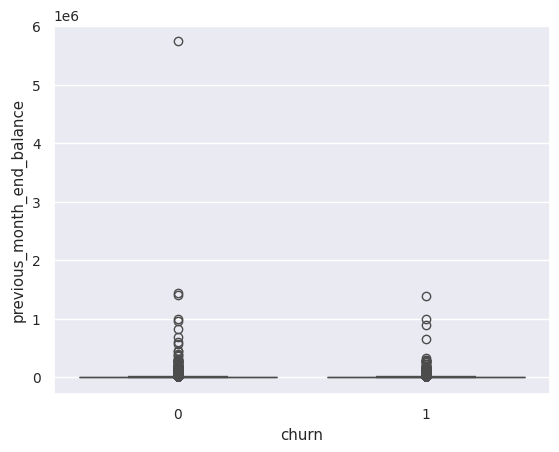

In [ ]:
# Visualize the boxplot :
# Previous month balance vs churn
sns.boxplot(x = "churn", y = "previous_month_end_balance", data = raw_data); previous_month_balance

In [ ]:
# ## Plot the relationship between 'current_balance', 'current_month_balance', 'previous_month_end_balance', and 'previous_month_balance' vs 'churn'
fig, axes = plt.subplots(1,2, figsize=(20,3))
axes=axes.flatten()
sns.set(font_scale=0.9)

curr_prev_month_balance = ['previous_month_end_balance','previous_month_balance']

for i, col in enumerate(curr_prev_month_balance):

    sns.boxplot(data=raw_data, x=col, y='churn', orient='h', palette=sns.color_palette('tab10', 2), width=0.4, ax=axes[i])
    axes[i].set_title('{} vs churn'.format(col.replace('_',' ')))
    axes[i].set_xlabel(xlabel='')

plt.tight_layout()
plt.show()

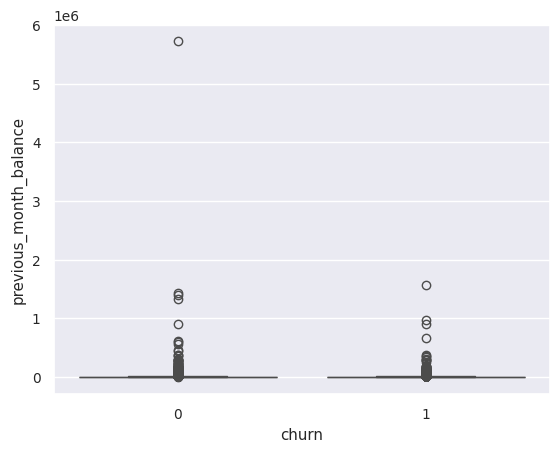

In [ ]:
# Visualize the boxplot :
# Previous month end balance vs churn
sns.boxplot(x = "churn", y = "previous_month_balance", data = raw_data);

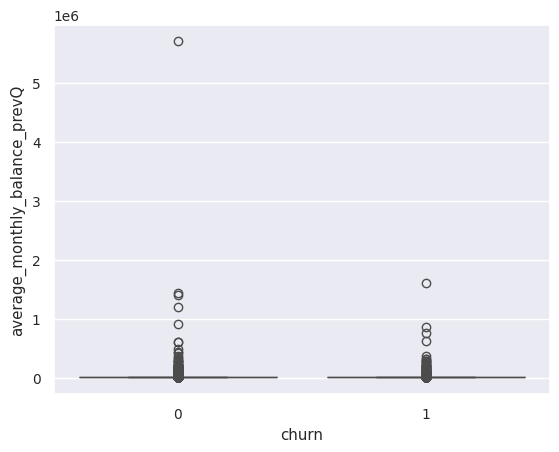

In [ ]:
# Visualize the boxplot : Average monthly balance vs churn
sns.boxplot(x = "churn", y = "average_monthly_balance_prevQ", data = raw_data);

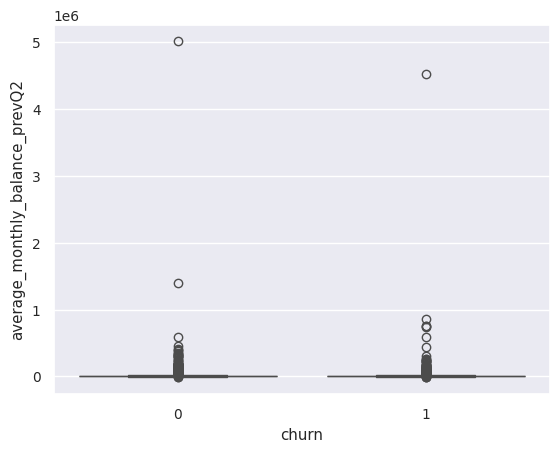

In [ ]:
# Visualize the boxplot : Average Monthly balance prev Q2 vs Churn
sns.boxplot(x = "churn", y = "average_monthly_balance_prevQ2", data = raw_data);

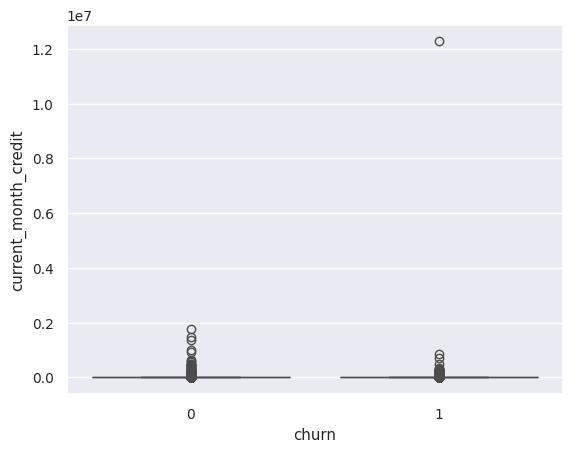

In [ ]:
# Visualize the boxplot : Current Month Credit vs Churn
sns.boxplot(x = "churn", y = "current_month_credit", data = raw_data);

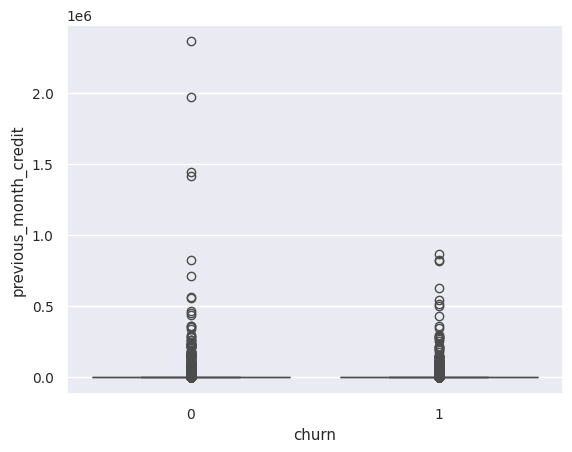

In [ ]:
# Visualize the boxplot : Previous Month Credit vs Churn
sns.boxplot(x = "churn", y = "previous_month_credit", data = raw_data);

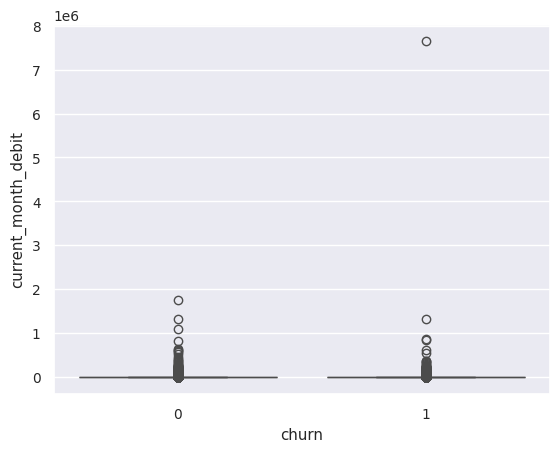

In [ ]:
# Visualize the boxplot : Current Month Debit vs Churn
sns.boxplot(x = "churn", y = "current_month_debit", data = raw_data);

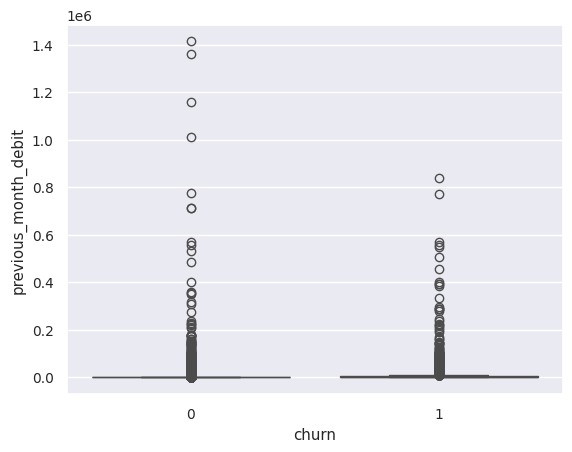

In [ ]:
# Visualize the boxplot : Previous Month Debit vs Churn
sns.boxplot(x = "churn", y = "previous_month_debit", data = raw_data);

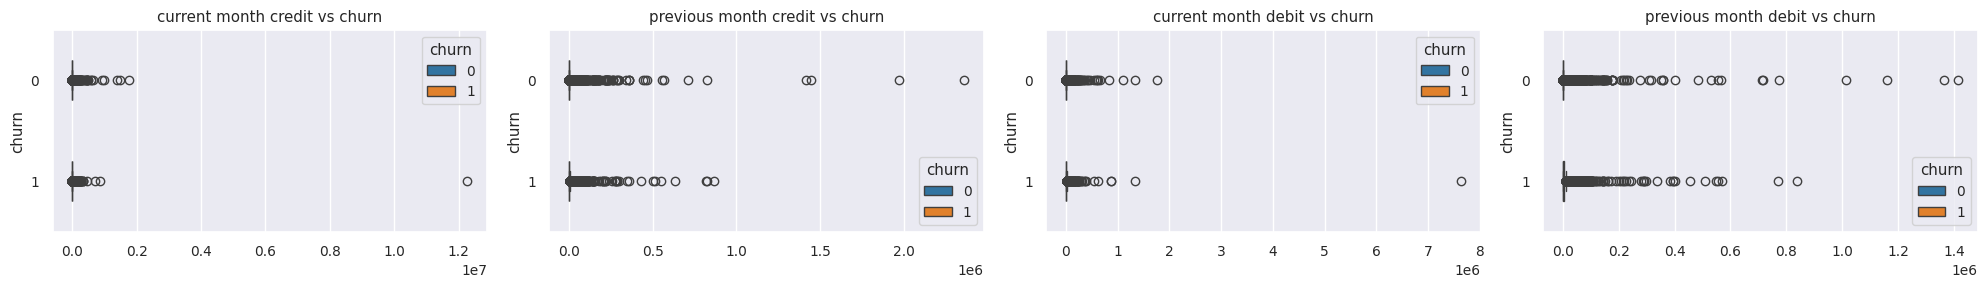

In [ ]:
## Plot the relationship between 'current_month_credit', 'previous_month_credit', 'current_month_debit', 'previous_month_debit', and 'churn'
credit_debit = ['current_month_credit','previous_month_credit','current_month_debit','previous_month_debit']

fig, axes = plt.subplots(1,4, figsize=(20,3))

axes=axes.flatten()

for i, col in enumerate(credit_debit):

    sns.boxplot(data=raw_data, x=col, y='churn', hue='churn', width=0.4, orient='h', palette=sns.color_palette('tab10', 2), ax=axes[i])
    axes[i].set_title('{} vs churn'.format(col).replace('_', ' '))
    axes[i].set_xlabel(xlabel='')

plt.tight_layout()
plt.show()

**Findings on Numerical:**

1.   **Current Balance**: Customers who churned have lower current balance compared to customers who Not-Churn.

2.   **Previous month balance/previous end month balance**: Customers who churned also have lower balance (from the previous month).

3.   **Outliers:** Churn datasets have lower outliers compared to Not-Churn

4.   **Current Month Credit/Current Month Debit**: Churn customers have credit  amount of transactions, which means they are more active compared to Not-Churn.

5.   **Previous Month Credit/Previous Month Debit**: Churn customers have credit and debit amount of transactions, which means they are more active compared to Not-Churn.

6.   **Outliers and credit/debit:** Churn datasets have lower outliers compared to Not-Churn



## 3. Assignment Feature Engineering
* Notes : Lakukan proses Feature Engineering berikut :
1. Lakukan Missing Value % Checking dan imputasi missing value di kolom pada dataset yang anda gunakan.
2. Outlier Handling bisa dilakukan atau tidak, tergantung sudut pandang keberadaan terhadap label target, jika terdapat banyak outlier hadir pada label target churn maka sebaiknya bisa dilakukan feature scalling (minmax scaller atau standar scaller) atau transformasi variable seperti logaritmik, akar kuadrat atau lainnya.
3. Encoding : OHE (One Hot Encoding), mean encoding, Label Encoding, atau teknik lainnya.
4. Feature Scalling : boleh dilakukan memakai minmax scaller ataupun standar scaller kemudian lakukan pengecekan distribusi sebelum dan setelah feature scalling menggunakan kdeplot.

* NB : Lakukan kaidah feature engineering (splitting dan teknik lainnya) seperti pada day 4.

In [ ]:
#Train test Split (train : tes = 80:20)
from sklearn.model_selection import train_test_split
train, test = train_test_split(raw_data, test_size = 0.2, random_state=42)

In [ ]:
train.churn.value_counts(normalize=True)

0    0.81405
1    0.18595
Name: churn, dtype: float64

In [ ]:
test.churn.value_counts(normalize=True)

0    0.817157
1    0.182843
Name: churn, dtype: float64

In [ ]:
# Missing value Handling
train.isna().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             427
dependents                        1989
occupation                          68
city                               633
customer_nw_category                 0
branch_code                          0
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
last_transaction                     0
dtype: int64

In [ ]:
test.isna().sum()

customer_id                         0
vintage                             0
age                                 0
gender                             98
dependents                        474
occupation                         12
city                              170
customer_nw_category                0
branch_code                         0
current_balance                     0
previous_month_end_balance          0
average_monthly_balance_prevQ       0
average_monthly_balance_prevQ2      0
current_month_credit                0
previous_month_credit               0
current_month_debit                 0
previous_month_debit                0
current_month_balance               0
previous_month_balance              0
churn                               0
last_transaction                    0
dtype: int64

In [ ]:
# Calculate the percentage % of column "gender" which is NA of Total Raw_data
100 * len(raw_data[raw_data['gender'].isna()]) / len(raw_data)

1.8497639348883095

In [ ]:
# Calculate the percentage % of column "dependents" which is NA of Total Raw_data
100 * len(raw_data[raw_data['dependents'].isna()]) / len(raw_data)



8.678035374533154

In [ ]:
# Calculate the percentage % of column "occupation" which is NA of Total Raw_data
100 * len(raw_data[raw_data['occupation'].isna()]) / len(raw_data)


0.2818687900782186

In [ ]:
# Calculate the percentage % of column "city" which is NA of Total Raw_data
100 * len(raw_data[raw_data['city'].isna()]) / len(raw_data)

2.829257980410119

In [ ]:
# Fill up NaN's for train dataset
train['gender'].fillna(train['gender'].mode()[0], inplace=True)
train['occupation'].fillna(train['occupation'].mode()[0], inplace=True)
train['city'].replace(np.nan, '0', inplace=True)
train['dependents'].fillna(train['age'].mode()[0], inplace=True)


# Fill up NaN's for test dataset
test['gender'].fillna(test['gender'].mode()[0], inplace=True)
test['occupation'].fillna(test['occupation'].mode()[0], inplace=True)
test['city'].replace(np.nan, '0', inplace=True)
test['dependents'].fillna(test['age'].mode()[0], inplace=True)

In [ ]:
train['city'].replace('null', 0, inplace=True)
train['city'] = pd.to_numeric(train['city'], errors='coerce')
train['city'].fillna(-1, inplace=True)

test['city'].replace('null', 0, inplace=True)
test['city'] = pd.to_numeric(test['city'], errors='coerce')
test['city'].fillna(-1, inplace=True)

In [ ]:
train.isna().sum()

customer_id                       0
vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
last_transaction                  0
dtype: int64

In [ ]:
test.isna().sum()

customer_id                       0
vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
last_transaction                  0
dtype: int64

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22705 entries, 12553 to 23654
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     22705 non-null  int64  
 1   vintage                         22705 non-null  int64  
 2   age                             22705 non-null  int64  
 3   gender                          22705 non-null  float64
 4   dependents                      22705 non-null  float64
 5   occupation                      22705 non-null  object 
 6   city                            22705 non-null  float64
 7   customer_nw_category            22705 non-null  int64  
 8   branch_code                     22705 non-null  int64  
 9   current_balance                 22705 non-null  float64
 10  previous_month_end_balance      22705 non-null  float64
 11  average_monthly_balance_prevQ   22705 non-null  float64
 12  average_monthly_balance_prev

In [ ]:
# Perform Label encoding for 'gender', 'occupation', 'city', 'last_transaction'
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
cat_cols = ['city', 'occupation','last_transaction']
for col in cat_cols:
  train[col] = le.fit_transform(train[col])
train.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                            float64
dependents                        float64
occupation                          int64
city                                int64
customer_nw_category                int64
branch_code                         int64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
last_transaction                    int64
dtype: object

In [ ]:
# Re-check Prior to Model Establishment
train.head(10)

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
12553,13405,2229,49,1.0,0.0,3,968,2,878,4136.36,4207.79,4401.15,88.31,0.21,0.21,0.21,0.21,4163.46,4577.61,0,271
27611,29473,2251,61,1.0,0.0,2,916,2,1,4583.05,26659.58,12653.39,15063.84,5286.04,0.33,35028.90,2143.78,12711.67,21721.55,0,351
13177,14070,2201,61,1.0,0.0,2,300,3,2213,973.41,2259.13,2185.23,2244.81,0.34,0.34,1286.06,0.34,2037.45,2259.13,1,358
3737,3983,2412,57,1.0,2.0,2,837,2,791,1356.24,1784.81,2280.21,5575.20,0.19,0.19,857.33,1857.33,1442.44,2203.24,0,136
6267,6687,1872,41,1.0,0.0,2,916,3,227,1300.41,4381.08,3022.75,4161.41,0.30,20846.01,817.71,15064.70,1649.05,5432.89,0,310
25119,26814,1593,73,1.0,0.0,3,126,2,9,2686.35,4998.05,4996.64,5674.88,12.49,0.20,3256.49,2104.74,3379.29,5938.74,1,354
16745,17874,1831,55,1.0,1.0,3,8,2,121,2622.32,1508.47,3947.61,5608.79,3061.76,2058.59,978.06,689.49,2292.73,1661.27,0,346
11201,11969,1976,36,1.0,0.0,2,432,2,232,2430.90,2568.68,2515.03,2565.32,0.49,0.49,209.70,619.27,2536.38,2543.40,0,283
8072,8600,1896,65,1.0,2.0,2,1413,1,384,6100.55,6006.46,8818.21,5381.95,13157.20,535.77,13276.03,36412.09,6687.71,8154.74,0,347
21812,23264,1983,34,1.0,0.0,2,877,3,1854,11267.03,10250.32,10674.05,9522.77,1260.46,0.46,29.39,0.46,10936.43,10287.25,0,337


In [ ]:
# Re-check Prior to Model Establishment
test.head(10)

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
27546,29404,2413,53,0.0,3.0,self_employed,146.0,2,2841,103.56,1674.99,1833.00,2738.50,0.44,0.44,1429.01,5000.44,236.57,1315.54,0,2019-09-04
16516,17629,1429,30,0.0,90.0,salaried,334.0,2,750,76.97,76.97,1531.19,2547.20,0.70,0.70,0.70,2757.84,76.97,1962.68,1,NaT
11680,12476,2395,32,0.0,0.0,salaried,980.0,2,655,1471.60,1912.21,1754.23,444.05,34.51,60.27,485.38,718.38,1718.09,2139.74,1,2019-12-14
20270,21629,2345,67,1.0,0.0,retired,666.0,2,715,3008.04,3014.99,2925.30,5136.41,36.29,214.43,43.24,294.29,3029.92,3071.65,0,2019-12-11
9185,9796,1613,45,1.0,0.0,self_employed,1096.0,2,933,6217.26,6903.60,8392.78,9228.10,114.87,4538.01,789.16,8898.01,6225.23,9362.04,0,2019-12-24
19437,20746,2162,43,1.0,0.0,salaried,1111.0,1,120,1598.07,1655.64,1663.09,1728.95,0.56,0.56,32.70,7.70,1630.06,1662.32,0,NaT
15344,16371,2117,35,1.0,0.0,self_employed,409.0,3,1658,1823.81,1823.81,1823.81,1812.26,0.61,0.61,0.61,0.61,1823.81,1823.81,0,2019-02-02
8665,9238,2008,46,1.0,0.0,self_employed,1437.0,2,1063,2106.88,2106.88,2106.88,2053.96,0.13,0.13,0.13,0.13,2106.88,2106.88,0,2019-05-17
2201,2359,2027,55,1.0,2.0,self_employed,409.0,2,1376,1040.48,3430.83,33617.81,52604.15,1975.14,1889.86,0.26,0.26,3683.64,45304.97,1,2019-12-13
25571,27299,2123,55,1.0,0.0,self_employed,1597.0,3,737,3043.97,3758.26,3244.99,1605.17,0.37,0.37,0.37,0.37,3462.69,3758.26,0,2019-10-19


### 4. Assignment Modelling
1. Gunakan Machine Learning Model dibawah ini :
- Logistic Regression
- KNN
- Decision tree
- SVM RBF
- Dengan ratio : class_weight bilamana terdapat imbalance pada dataset #class_weight = pembobotan, (kecuali pada KNN)
2. Lakukan fitting dan Model evaluasi di tiap model, keluarkan nilai pada confusion matrix (akurasi, recall, presisi, f1-score). Fokuslah pada nilai recall untuk menentukan model terbaik (melihat pada selisih nilai evaluasi di train dengan test) karena churn bisa kita fokuskan pada recall maupun presisi bila datanya tidak balance, jika balance maka bisa gunakan akurasi + recall atau akurasi + presisi.
3. Selain nilai confusion matrix yang dibandingkan antara train dan test untuk melihat overfitting atau underfitting, lakukan juga pengecekan learning curve untuk melihat modelnya optimal (model terbaik), atau underfitting, atau overfitting. Gunakanlah scoring ROC-AUC untuk matrix pada learning curve, cv = 5, lakukan concat pada X_train dengan X_test menjadi x, y_train dengan y_test menjadi y.

In [ ]:
#split dataset to X_train, y_train, X_test, y_test
X_train = train.drop(columns=['churn'])
y_train = train['churn']
X_test = test.drop(columns=['churn'])
y_test = test['churn']

In [ ]:
# Check the train and test shape
print(f"X Train (row, columns) : {X_train.shape}")
print(f"Y Train (row, columns) : {y_train.shape}")

print(f"X Test (row, columns) : {X_test.shape}")
print(f"Y Test (row, columns) : {y_test.shape}")

X Train (row, columns) : (22705, 20)
Y Train (row, columns) : (22705,)
X Test (row, columns) : (5677, 20)
Y Test (row, columns) : (5677,)


In [ ]:
# Re-check dataset post Split
X_train.head(10)

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,last_transaction
12553,13405,2229,49,1.0,0.0,3,968,2,878,4136.36,4207.79,4401.15,88.31,0.21,0.21,0.21,0.21,4163.46,4577.61,271
27611,29473,2251,61,1.0,0.0,2,916,2,1,4583.05,26659.58,12653.39,15063.84,5286.04,0.33,35028.90,2143.78,12711.67,21721.55,351
13177,14070,2201,61,1.0,0.0,2,300,3,2213,973.41,2259.13,2185.23,2244.81,0.34,0.34,1286.06,0.34,2037.45,2259.13,358
3737,3983,2412,57,1.0,2.0,2,837,2,791,1356.24,1784.81,2280.21,5575.20,0.19,0.19,857.33,1857.33,1442.44,2203.24,136
6267,6687,1872,41,1.0,0.0,2,916,3,227,1300.41,4381.08,3022.75,4161.41,0.30,20846.01,817.71,15064.70,1649.05,5432.89,310
25119,26814,1593,73,1.0,0.0,3,126,2,9,2686.35,4998.05,4996.64,5674.88,12.49,0.20,3256.49,2104.74,3379.29,5938.74,354
16745,17874,1831,55,1.0,1.0,3,8,2,121,2622.32,1508.47,3947.61,5608.79,3061.76,2058.59,978.06,689.49,2292.73,1661.27,346
11201,11969,1976,36,1.0,0.0,2,432,2,232,2430.90,2568.68,2515.03,2565.32,0.49,0.49,209.70,619.27,2536.38,2543.40,283
8072,8600,1896,65,1.0,2.0,2,1413,1,384,6100.55,6006.46,8818.21,5381.95,13157.20,535.77,13276.03,36412.09,6687.71,8154.74,347
21812,23264,1983,34,1.0,0.0,2,877,3,1854,11267.03,10250.32,10674.05,9522.77,1260.46,0.46,29.39,0.46,10936.43,10287.25,337


In [ ]:
# Re-check dataset post Split
y_train.head(10)

12553    0
27611    0
13177    1
3737     0
6267     0
25119    1
16745    0
11201    0
8072     0
21812    0
Name: churn, dtype: int64

In [ ]:
y_train.value_counts(normalize=True)

0    0.81405
1    0.18595
Name: churn, dtype: float64

In [ ]:
y_test.value_counts(normalize=True)

0    0.817157
1    0.182843
Name: churn, dtype: float64

### 4.1 Logistic Regression

In [ ]:
# class_weight = {0: 0.265531, 1: 0.734469}: This is the key part, where you're specifying class weights for the logistic regression model.
# class_weight = pembobotan; how much label 0 has gap with label 1
logistic_model = LogisticRegression(
    random_state = 42,
    class_weight = {0: 0.182843, 1:0.817157}
)

In [ ]:
logistic_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight={0: 0.182843, 1: 0.817157}, random_state=42)

### 4.2 KNN

In [ ]:
knn_clf = KNeighborsClassifier()

In [ ]:
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

### 4.3 Decision Tree

In [ ]:
dt_clf = DecisionTreeClassifier(
    random_state = 42,
    class_weight = {0: 0.182843, 1:0.817157}
)

In [ ]:
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.182843, 1: 0.817157}, random_state=42)

### 4.4 SVM (Support Vector Machine)

In [ ]:
svm_clf = SVC(
    random_state = 42,
    probability=True,
    class_weight = {0: 0.265531, 1:0.734469}
)

In [ ]:
svm_clf.fit(X_train, y_train)

### 5. Assignment Profitable : Cumulative Gain Plot
1. Gunakan model terbaik dari hasil evaluasi di soal nomor 4 diatas.
2. Gunakan plot_cumulative_gain dari scikitplot library
3. Pilih Kelas 1 (yes churn) dari hasil prediksi X_test, lakukan sampling (nilainya bebas) yang diambil dari plot_cumulative_gain
4. Hitunglah menggunakan rumus dibawah ini di excel :

### Langkah-langkah menghitung profitable :
1. Pilih berapa banyak sample misal 20% dari keseluruhan (kelas 1 dan 0)
- Kenapa secara teknis dilakukan keseluruhan sample tidak pada kelas 1 saja ? karena pemilihan samplenya dimulai dari hasil predict_probe dengan score tertinggi hingga terendah.
2. Lalu berapa nilai % responders dibagian kelas 1 (Poitive classes) yg didapat dari sample yg diambil / pada poin 1
- % responders (Gain) = jumlah orang yg diprediksi churn / keseluruhan prediksi kelas 1
- jumlah orang yg diprediksi churn = % responders (Gain) x keseluruhan prediksi kelas 1
3. Bandingkan model machine learning dengan random sampling hanya dapat berapa orang jumlah responder churn-nya

### Interpretasi hasil cumulative gain plot dan lift plot ada pada Excel.
**formula profitable**
1. Saved = Jumlah orang yang Churn baik dari prediksi model atau random sampling dari prediksi model
2. Failed = Orang yang gagal diprediksi sebagai Churn (False negatif : prediksi tidak churn tapi faktanya churn) atau Orang yang diprediksi churn tapi faktanya tidak churn (False Positif)
- Absolut (y_test (churn, data aktual churn) - y_pred (churn, data prediksi churn))
3. Asumsi biaya campaign = Rp 30.000 (2$ per bulan)
3. Potensi keuntungan per orang (15%) = 15% dari biaya campaign (15% * biaya campaign)
4. Failed Cost = Failed * Biaya campaign (per orang) + Failed * Potensi keuntungan per orang (15%)
5. Total Cost = Biaya campaign * jumlah orang yg diprediksi churn
6. Profit = Saved * potensi keuntungan (15%) * total cost
7. Netto = Profit - Total Cost - Failed Cost





In [ ]:
#tambahkan cell jika diperlukan

## Notes :
Kumpulkan di LMS link google collab yang sudah dibuka aksesnya + sudah di run dan save output codenya + cantumkan link postingan linkedin di markdown google collab

### Link Postingan Linkedin (cantumkan disini) :